In [1]:
import numpy as np
from keras.datasets import boston_housing

from keras.models import Sequential
from keras.layers import Dense

from keras.metrics import RootMeanSquaredError

from sklearn.preprocessing import scale

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [3]:
X_train_scaled = scale(X_train)
X_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [4]:
X_test_scaled = scale(X_test)
X_test_scaled[0]

array([ 2.8040301 , -0.50784934,  0.96960877, -0.32969024,  1.23174581,
        0.11934137,  1.14739788, -0.91935276,  1.60609286,  1.40778227,
        0.90513041, -4.27829517,  2.51324773])

In [5]:
model = Sequential()

# First Hidden Layer
model.add(Dense(64, activation='relu', input_shape=(13,)))
# Second Hidden Layer
model.add(Dense(32, activation='relu'))
# Output Layer
model.add(Dense(1, activation='relu'))

In [6]:
rmse = RootMeanSquaredError(name = 'rmse')

In [7]:
model.compile(loss='mse', optimizer='sgd', metrics=[rmse])

In [8]:
results = model.fit(
  x=X_train_scaled,
  y=y_train,
  epochs=500,
  batch_size=128,
  verbose=1,
  validation_split= 0.2
)


Epoch 1/500
3/3 [==============================] - 2s 174ms/step - loss: 484.4729 - rmse: 22.0107 - val_loss: 124.7250 - val_rmse: 11.1680
Epoch 2/500
3/3 [==============================] - 0s 40ms/step - loss: 240.1313 - rmse: 15.4962 - val_loss: 94.1410 - val_rmse: 9.7026
Epoch 3/500
3/3 [==============================] - 0s 40ms/step - loss: 170.9346 - rmse: 13.0742 - val_loss: 114.7399 - val_rmse: 10.7117
Epoch 4/500
3/3 [==============================] - 0s 52ms/step - loss: 210.5896 - rmse: 14.5117 - val_loss: 33.9425 - val_rmse: 5.8260
Epoch 5/500
3/3 [==============================] - 0s 51ms/step - loss: 45.6205 - rmse: 6.7543 - val_loss: 138.0971 - val_rmse: 11.7515
Epoch 6/500
3/3 [==============================] - 0s 25ms/step - loss: 85.7872 - rmse: 9.2621 - val_loss: 181.8671 - val_rmse: 13.4858
Epoch 7/500
3/3 [==============================] - 0s 26ms/step - loss: 277.8392 - rmse: 16.6685 - val_loss: 190.3287 - val_rmse: 13.7960
Epoch 8/500
3/3 [========================

In [9]:
score = model.evaluate(x=X_test_scaled, y=y_test, verbose = 0)
print('Test mse: ', score[0])
print('Test rmse: ', score[1])

Test mse:  14.557991027832031
Test rmse:  3.8154938220977783


Text(0, 0.5, 'Losses')

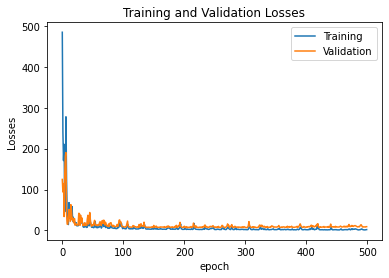

In [10]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'RMSE')

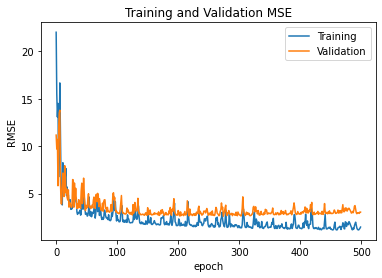

In [11]:
plt.plot(results.history['rmse'])
plt.plot(results.history['val_rmse'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation MSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')

In [12]:
prediction = model.predict(X_test_scaled)
print(prediction.flatten())
print(y_test)

[ 8.928222  17.833956  19.662457  29.27784   21.977896  22.682291
 29.419716  21.850359  18.64565   19.109966  17.039326  14.85276
 14.365405  38.988297  14.755122  21.106174  23.421303  22.454401
 18.311857  20.181482  10.007987  11.355257  19.593616  14.519418
 18.091915  21.736063  31.57848   24.628683   8.826252  20.583849
 19.815964  13.845142  34.14318   22.173357  16.059368   5.8355155
 17.049366  17.429296  18.267426  27.077868  30.387642  26.044786
 12.557302  39.335915  32.40725   25.515974  27.327566  18.542046
 19.480452  22.09639   32.661316  18.512077   8.224972  12.46343
 36.27678   26.451662  10.598513  51.130905  34.249596  21.790571
 19.432888  12.796971  14.518634  20.182625  23.020996  19.151638
 12.561743  19.74735   14.785182   6.5822973 18.334297  25.065632
 25.110098  14.889004  24.951468  19.34983   19.420057  24.838789
 34.585175   7.356942  20.13475   39.11705   14.694812  12.612474
 17.092674  18.893621  14.165236  20.28829   21.75295   24.158163
 17.728481 